# Walmart

In [0]:
# storing and anaysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from  IPython.display import display, HTML, display_html
%matplotlib inline
sns.set()

# Time
import datetime
from datetime import datetime

# Facebook Prophet
# !pip install pystain
# !pip install fbprophet
from fbprophet import Prophet

# Stats tools
from statsmodels.tsa.stattools import adfuller # Dickey-Fuller test
from statsmodels.tsa.seasonal import seasonal_decompose # Moving Average
from statsmodels.tsa.stattools import acf, pacf # Autocorrelation and Partial Autocorrelation
from statsmodels.tsa.arima_model import ARIMA # AutoRegressive Integrated Moving Average

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Cleaning and Merging

In [0]:
# Data set was already merged from a previous project
walmart = pd.read_csv('/content/drive/My Drive/DataSets/Walmart Data/new_Walmart.csv')

# Removes the NA's the data
for name in walmart.columns:
  walmart[name] = walmart[name].fillna( value = 1e-10 )


In [0]:
walmart.head()

,Unnamed: 0,Date,Store,Dept,Weekly_Sales,IsHoliday.x,Type,Size,X1,index,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday.y
0,1,2010-02-05,1,1,24924.50,0,A,151315,1,0,42.31,2.572,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,211.096358,8.106,0
1,2,2010-02-05,1,26,11737.12,0,A,151315,1,0,42.31,2.572,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,211.096358,8.106,0
2,3,2010-02-05,1,17,13223.76,0,A,151315,1,0,42.31,2.572,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,211.096358,8.106,0
3,4,2010-02-05,1,45,37.44,0,A,151315,1,0,42.31,2.572,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,211.096358,8.106,0
4,5,2010-02-05,1,28,1085.29,0,A,151315,1,0,42.31,2.572,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,211.096358,8.106,0


# Data Visualization

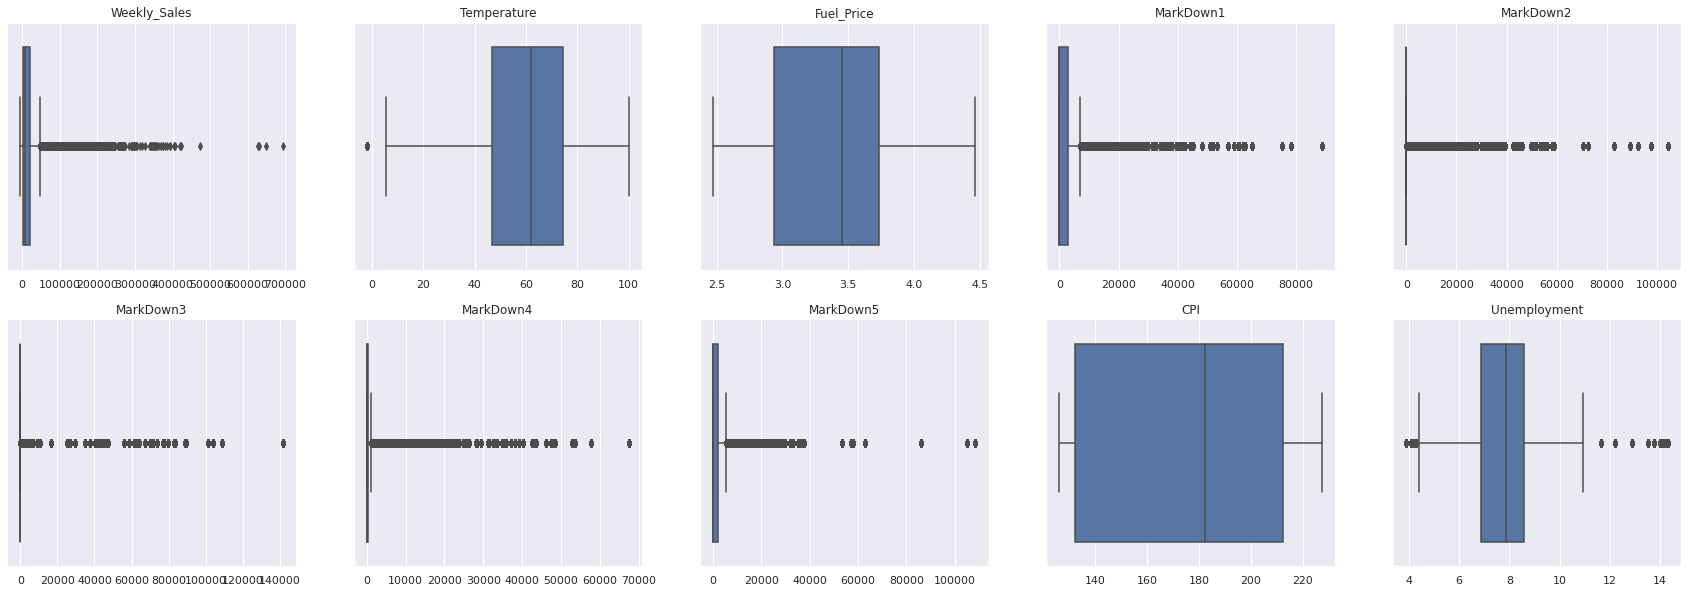

In [0]:
# Boxplots
plt.figure(figsize=(30,10))
count = 1
for name in walmart.columns:
  if name == 'Weekly_Sales'  or name == 'Temperature' or name == 'Fuel_Price' or name == 'Unemployment' or name == 'CPI' or name == 'MarkDown1' or name == 'MarkDown2' or name == 'MarkDown3' or name == 'MarkDown4' or name == 'MarkDown5':
    plt.subplot(2,5,count)
    count += 1
    plot_me = walmart[name]
    plot_me = plot_me.to_numpy()
    plot_me = plot_me.astype(float)
    sns.boxplot(plot_me).set(title = name)
plt.show()

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



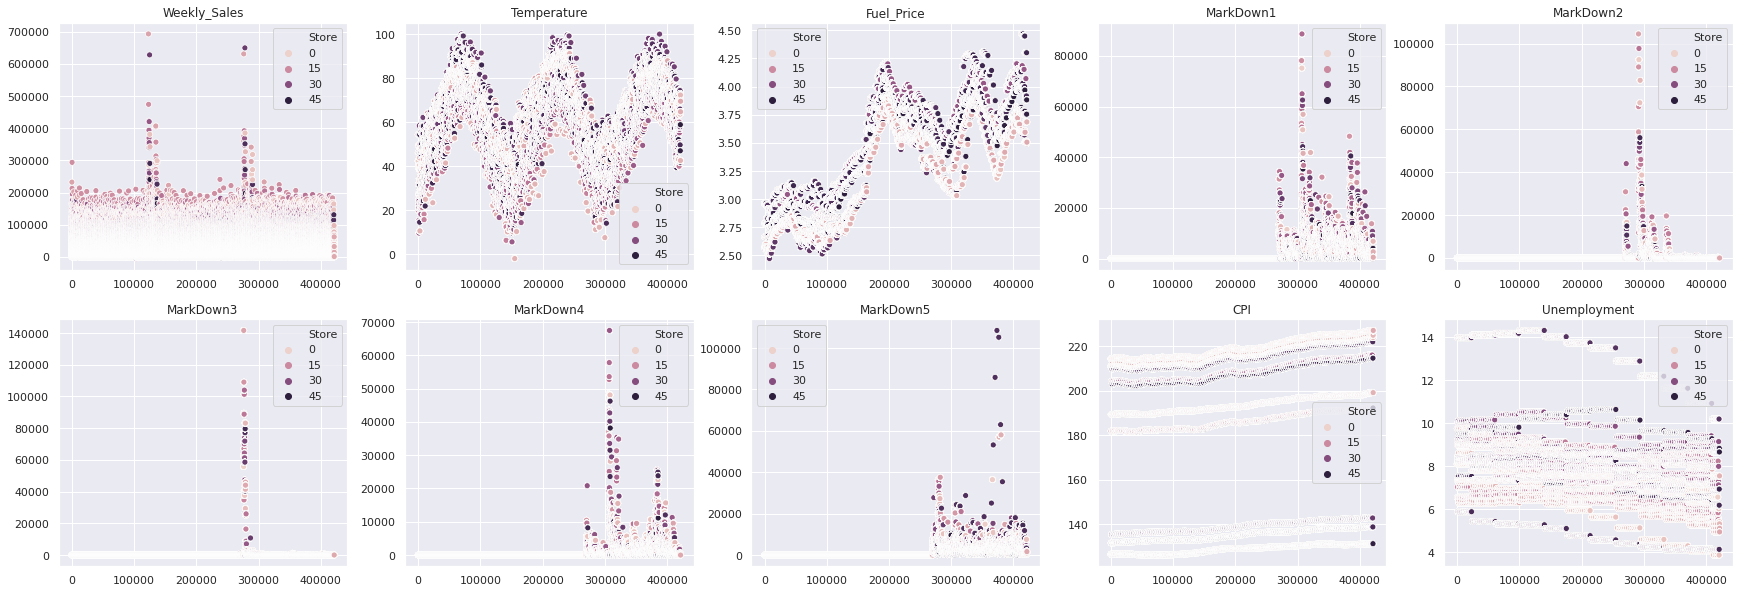

In [0]:
# Scatter Plot With COlor being the Stores
plt.figure(figsize=(30,10))
count = 1

for name in walmart.columns:
  if name == 'Weekly_Sales'  or name == 'Temperature' or name == 'Fuel_Price' or name == 'Unemployment' or name == 'CPI' or name == 'MarkDown1' or name == 'MarkDown2' or name == 'MarkDown3' or name == 'MarkDown4' or name == 'MarkDown5':
    plt.subplot(2,5,count)
    count += 1
    plot_me = walmart[name]
    plot_me = plot_me.to_numpy()
    plot_me = plot_me.astype(float)
    sns.scatterplot(range(len(plot_me)), plot_me, hue = walmart['Store']).set(title = name)
plt.show()


/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



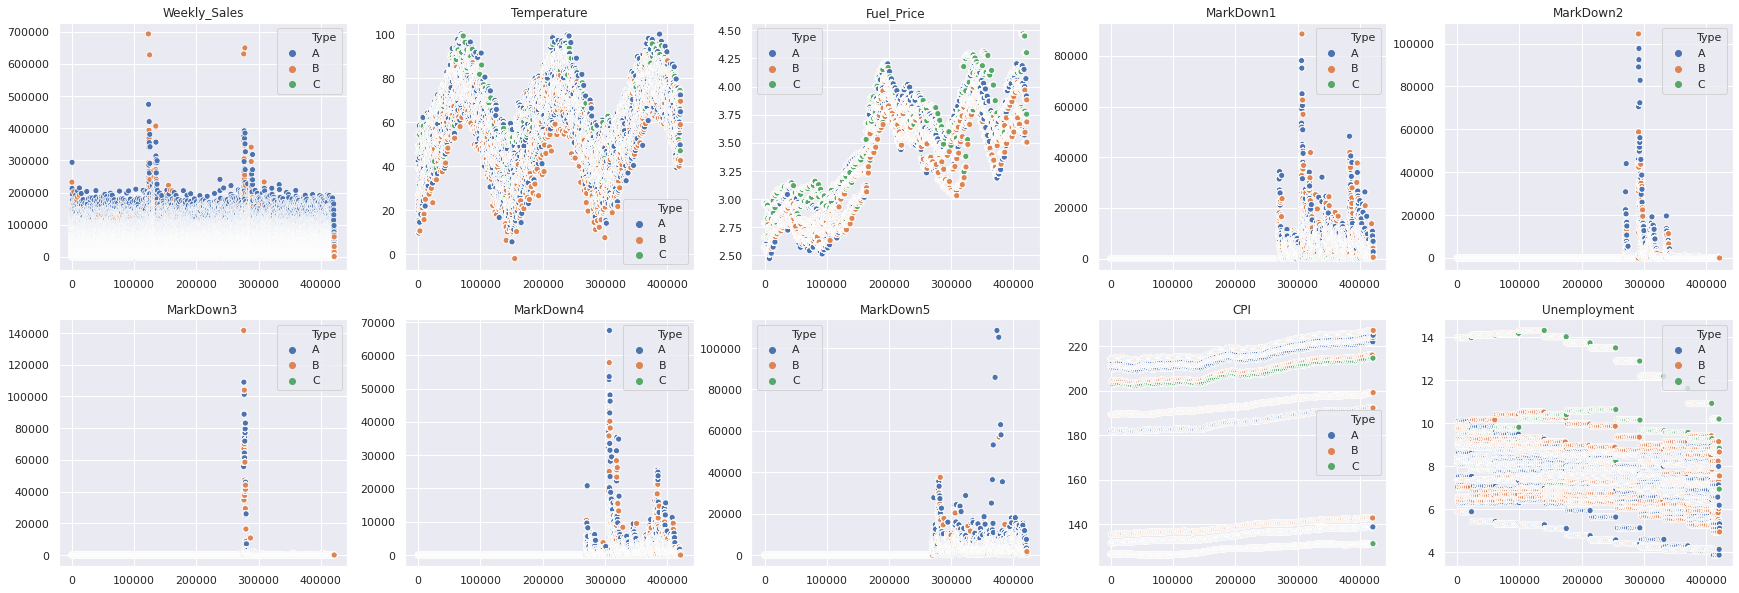

In [0]:
# Scatter Plot with Color being the store type
plt.figure(figsize=(30,10))
count = 1

for name in walmart.columns:
  if name == 'Weekly_Sales'  or name == 'Temperature' or name == 'Fuel_Price' or name == 'Unemployment' or name == 'CPI' or name == 'MarkDown1' or name == 'MarkDown2' or name == 'MarkDown3' or name == 'MarkDown4' or name == 'MarkDown5':
    plt.subplot(2,5,count)
    count += 1
    plot_me = walmart[name]
    plot_me = plot_me.to_numpy()
    plot_me = plot_me.astype(float)
    sns.scatterplot(range(len(plot_me)), plot_me, hue = walmart['Type']).set(title = name)
plt.show()

In [0]:
average_sales = pd.DataFrame.mean(walmart['Weekly_Sales'])
print(average_sales)

15981.258122139077


In [0]:
sum_sales = pd.DataFrame.sum(walmart['Weekly_Sales'])
num_of_stores = pd.DataFrame.max(walmart['Store'])
print(sum_sales/(num_of_stores*140))


1069399.8391349209


## New Walmart Data set based on the scatter plot

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



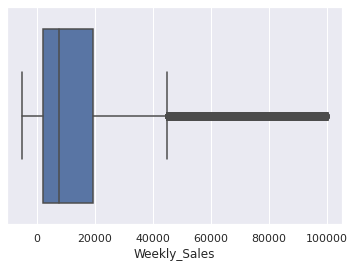

In [0]:
# Feature Selection 
# keep = ['Date',	'Store',	'Dept',	'Weekly_Sales', 'Type',	'Size',	'Temperature', 'Fuel_Price',	'MarkDown1',	'MarkDown2',	'MarkDown3',	'MarkDown4',	'MarkDown5',	'CPI',	'Unemployment']

# Highest Contenters are Fuel Prices, Weekely Sales, CPI, Unemployment
keep = ['Date',	'Store',	'Dept',	'Weekly_Sales', 'Type',	'Temperature', 'Fuel_Price',	'CPI',	'Unemployment']
df = walmart[keep]

for i in range(len(df['Weekly_Sales'])):
  if df['Weekly_Sales'][i] >= 100000:
    df['Weekly_Sales'][i] = pd.DataFrame.median(df['Weekly_Sales'])

sns.boxplot(df['Weekly_Sales'])

# Pulls out all the information about a single store
Store = walmart['Store'] == 1
Store1 = walmart[Store]
Department = Store1['Dept'] == 1
Department1 = Store1[Department]
Store1 = Department1

df = Store1

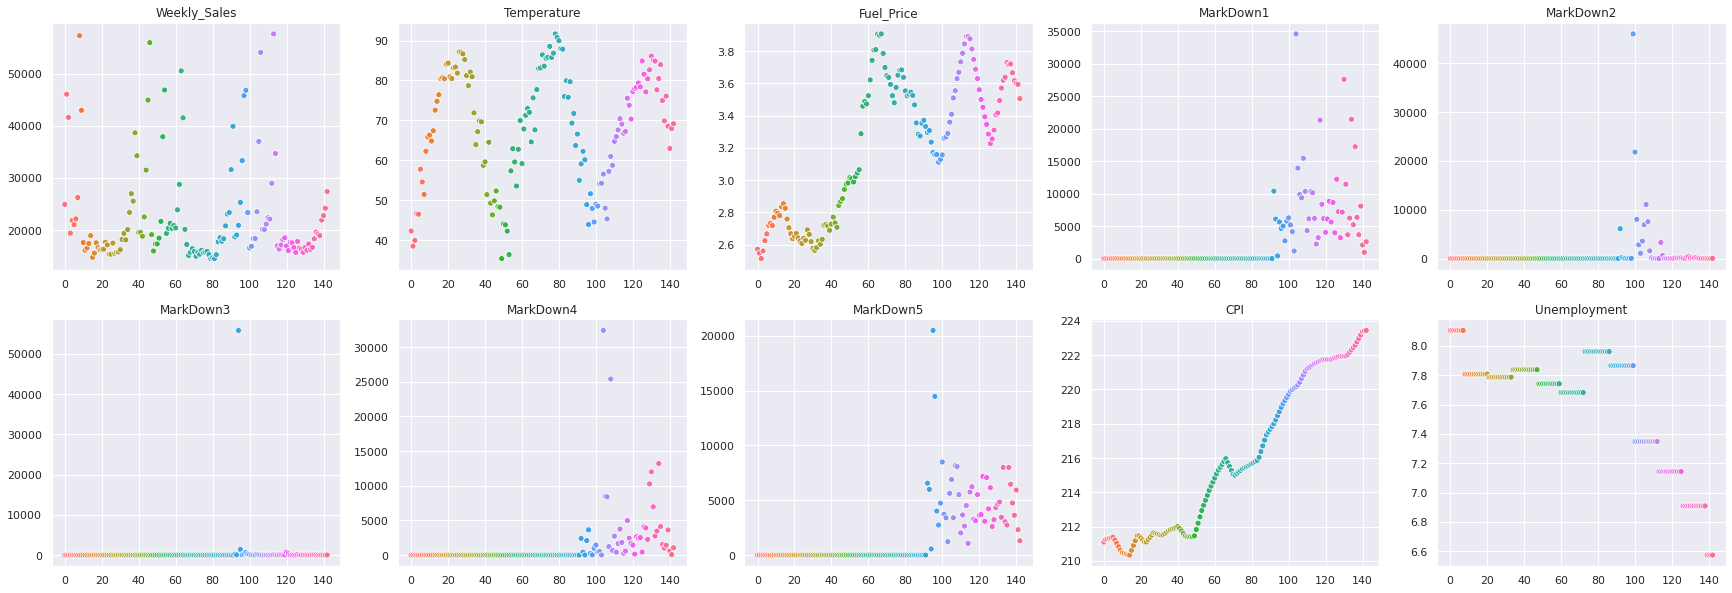

In [0]:
# Scatter Plot with Color being the date
plt.figure(figsize=(30,10))
count = 1

for name in Store1.columns:
  if name == 'Weekly_Sales'  or name == 'Temperature' or name == 'Fuel_Price' or name == 'Unemployment' or name == 'CPI' or name == 'MarkDown1' or name == 'MarkDown2' or name == 'MarkDown3' or name == 'MarkDown4' or name == 'MarkDown5':
    plt.subplot(2,5,count)
    count += 1
    plot_me = Store1[name]
    plot_me = plot_me.to_numpy()
    plot_me = plot_me.astype(float)
    sns.scatterplot(range(len(plot_me)), plot_me, hue = Store1['Date'], legend=False).set(title = name)
    # sns.lineplot(range(len(plot_me)), plot_me, hue = Store1['Dept']).set(title = name)
plt.show()

# Graphs that look best for Time Series (Temperature, Fuel_Price, CPI, Unemployment)
# Stuff to still look into (Weekly Sales) (IDEA: Sum sales of all Departments)
# Notes from summing all the Weekly sales: Summing all department sales by the day shows a super similar graph to the original on if you only consider sales above 100,000


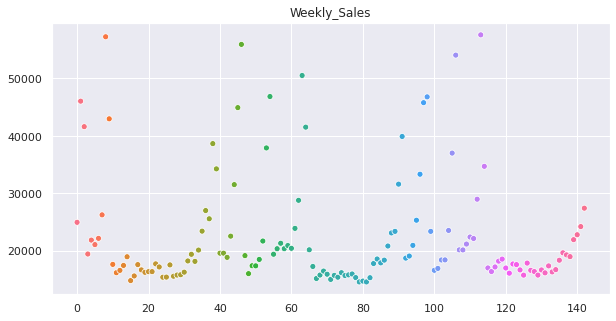

In [0]:
plt.figure(figsize=(10,5))
count = 1

for name in Store1.columns:
  if name == 'Weekly_Sales':
    count += 1
    plot_me = Store1[name]
    plot_me = plot_me.to_numpy()
    plot_me = plot_me.astype(float)
    sns.scatterplot(range(len(plot_me)), plot_me, hue = Store1['Date'], legend=False).set(title = name)
    # sns.lineplot(range(len(plot_me)), plot_me, hue = Store1['Dept']).set(title = name)
plt.show()

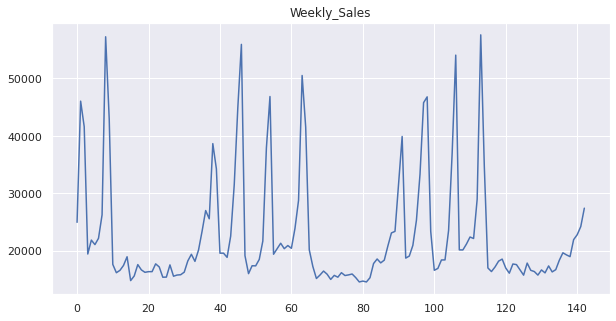

In [0]:
plt.figure(figsize=(10,5))
count = 1

for name in Store1.columns:
  if name == 'Weekly_Sales':
    count += 1
    plot_me = Store1[name]
    plot_me = plot_me.to_numpy()
    plot_me = plot_me.astype(float)
    # sns.scatterplot(range(len(plot_me)), plot_me, hue = Store1['Date'], legend=False).set(title = name)
    sns.lineplot(range(len(plot_me)), plot_me, legend= False).set(title = name)
plt.show()

# Formating the Data for Time Series analysis

In [0]:
df = df.rename(columns = {'Date':'ds', 'Weekly_Sales':'ws'})

keep2 = ['ds', 'ws']
df_example = df[keep2]


# Visualization For Weekly Sales

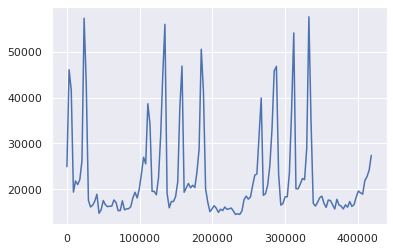

In [0]:
f, ax = plt.subplots(1,1)
ax.plot(df_example['ws'])

In [0]:
def test_stationarity(df, ts):
    """
    Test stationarity using moving average statistics and Dickey-Fuller test
    Source: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
    """
    
    # Determing rolling statistics
    rolmean = df[ts].rolling(window = 12, center = False).mean()
    rolstd = df[ts].rolling(window = 12, center = False).std()
    
    # Plot rolling statistics:
    orig = plt.plot(df[ts], 
                    color = 'blue', 
                    label = 'Original')
    mean = plt.plot(rolmean, 
                    color = 'red', 
                    label = 'Rolling Mean')
    std = plt.plot(rolstd, 
                   color = 'black', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    # Perform Dickey-Fuller test:
    """Cannot use for large Datasets"""
    # Null Hypothesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
    # print ('Results of Dickey-Fuller Test:')
    # dftest = adfuller(df[ts], 
    #                   autolag='AIC')
    # dfoutput = pd.Series(dftest[0:4], 
    #                      index = ['Test Statistic',
    #                               'p-value',
    #                               '# Lags Used',
    #                               'Number of Observations Used'])
    # for key, value in dftest[4].items():
    #     dfoutput['Critical Value (%s)'%key] = value
    # print (dfoutput)

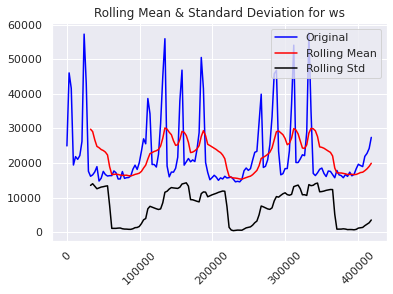

In [0]:
# Plots the Data wit the Rolling Mean and Rolling Std
test_stationarity(df = df_example, ts ='ws') # Rolling mean and Rolling Std appear to be stationary

## Transformers

In [0]:
def plot_transform(df, ts, ts_transform):
  f, ax = plt.subplots(1, 1)
  ax.plot(df[ts])
  ax.plot(df[ts_transform], color = 'red')


In [0]:
df_example['ws_log'] = df_example['ws'].apply(lambda x: np.log(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



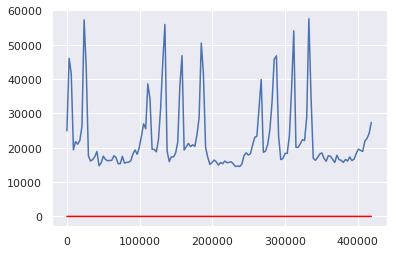

In [0]:
plot_transform(df_example, 'ws', 'ws_log')

In [0]:
df_example['ws_log_moving_avg'] = df_example['ws_log'].rolling(window =7, center = False).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
df_example['ws_moving_avg']      = df_example['ws'].rolling(window = 7, center = False).mean()
df_example['ws_log_diff']        = df_example['ws_log'].diff()
df_example['ws_moving_avg_diff'] = df_example['ws'] - df_example['ws_moving_avg']
df_example['ws_ewma']            = df_example['ws'].ewm(halflife = 7, ignore_na = False, min_periods = 0, adjust = True).mean()
df_example['ws_log_ewma']        = df_example['ws_log'].ewm(halflife =7, ignore_na =False,min_periods=0, adjust=True).mean()
df_example['ws_log_ewma_diff']   = df_example['ws_log'] - df_example['ws_log_ewma']


df_example_trans = df_example.dropna()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [0]:
df_example_trans['ws_log_ewma']=df_example_trans['ws_log'].ewm(halflife =7, ignore_na =False,min_periods=0, adjust=True).mean()
df_example_trans['ws_log_ewma_diff']=df_example_trans['ws_log']-df_example_trans['ws_log_ewma']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



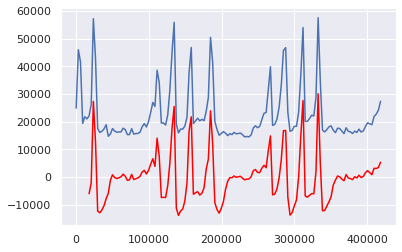

In [0]:
# Minus the Moving Average
plot_transform(df_example, 'ws', 'ws_moving_avg_diff')

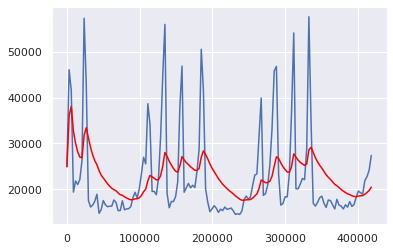

In [0]:
# Expontential Weighted Moving Average
plot_transform(df_example, 'ws', 'ws_ewma')

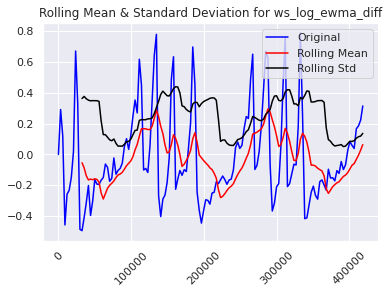

In [0]:
# Difference in the Log of the Expontential Weighted Moving Average
test_stationarity(df_example, 'ws_log_ewma_diff')

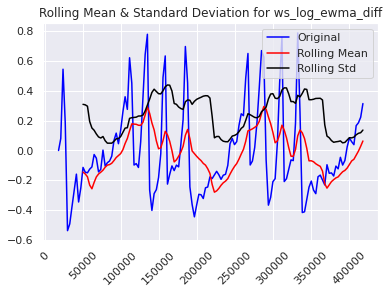

In [0]:
# Difference in the Log of the Expontential Weighted Moving Average for the Transformation
test_stationarity(df_example_trans, 'ws_log_ewma_diff')

## Decomposition Analysis

In [0]:
def plot_decomposition(df, ts, trend, seasonal, residual):
    
  f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15, 5), sharex = True)

  ax1.plot(df[ts], label = 'Original')
  ax1.legend(loc = 'best')
  ax1.tick_params(axis = 'x', rotation = 45)

  ax2.plot(df[trend], label = 'Trend')
  ax2.legend(loc = 'best')
  ax2.tick_params(axis = 'x', rotation = 45)

  ax3.plot(df[seasonal],label = 'Seasonality')
  ax3.legend(loc = 'best')
  ax3.tick_params(axis = 'x', rotation = 45)

  ax4.plot(df[residual], label = 'Residuals')
  ax4.legend(loc = 'best')
  ax4.tick_params(axis = 'x', rotation = 45)
  plt.tight_layout()

  # plt.subtitle('Signal Decomposition of %s' %(ts), x = 0.5, y = 1.05, fontsize = 18)
  plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



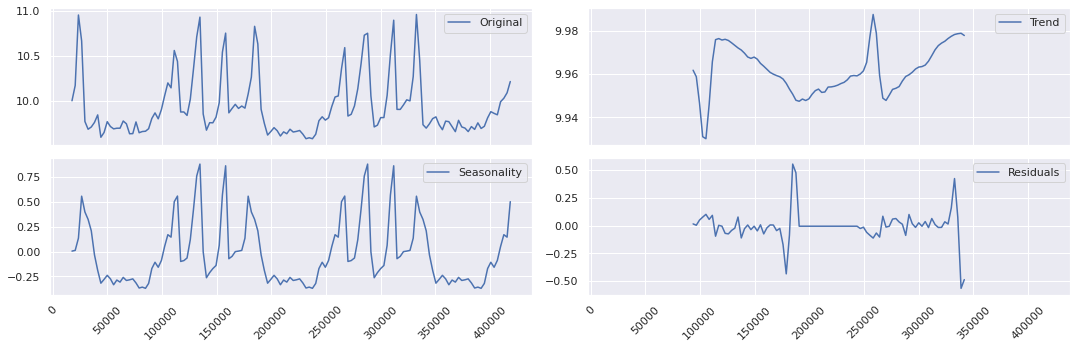

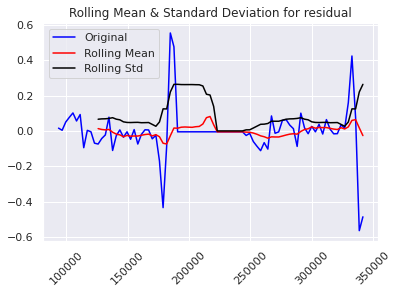

In [0]:
decomposition = seasonal_decompose(df_example_trans['ws_log'], freq = 52)

df_example_trans.loc[:,'trend']    = decomposition.trend
df_example_trans.loc[:,'seasonal'] = decomposition.seasonal
df_example_trans.loc[:,'residual'] = decomposition.resid

plot_decomposition(df = df_example_trans, ts= 'ws_log', trend='trend', seasonal='seasonal', residual='residual')

test_stationarity(df_example_trans.dropna(), ts='residual')

## ACF and PACF Plots

In [0]:
def plot_acf_pacf(df, ts):
  """
  Plot auto-correlation function (ACF) and partial auto-correlation (PACF) plots
  """
  f, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5)) 

  #Plot ACF: 
  ax1.plot(lag_acf)
  ax1.axhline(y=0,linestyle='--',color='gray')
  ax1.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax1.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax1.set_title('Autocorrelation Function for %s' %(ts))

  #Plot PACF:
  ax2.plot(lag_pacf)
  ax2.axhline(y=0,linestyle='--',color='gray')
  ax2.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax2.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax2.set_title('Partial Autocorrelation Function for %s' %(ts))
  
  plt.tight_layout()
  plt.show()
  plt.close()
  
  return

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



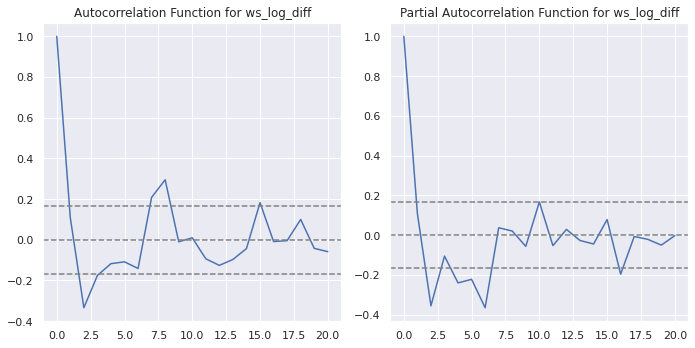

In [0]:
lag_acf = acf(np.array(df_example_trans['ws_log_diff']), nlags = 20)
lag_pacf = pacf(np.array(df_example_trans['ws_log_diff']), nlags = 20)

plot_acf_pacf(df = df_example_trans, ts = 'ws_log_diff')

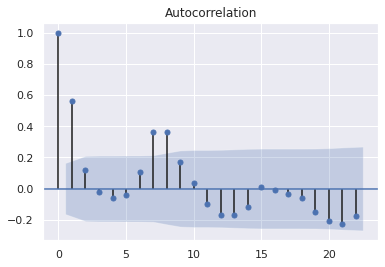

In [0]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['ws'])
plt.show()

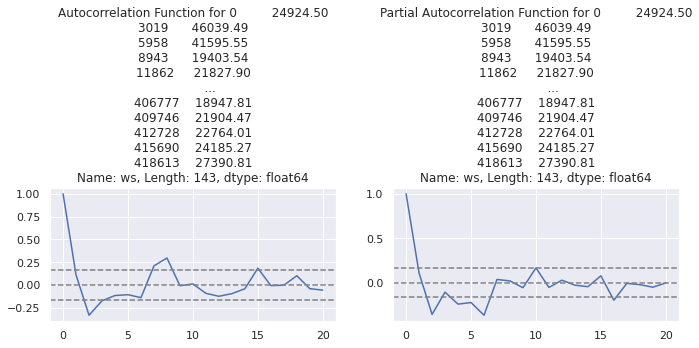

In [0]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf_pacf(df['ds'],df['ws'])
plt.show()


## ARIMA

In [0]:
def run_arima(df,ts,p,d,q):
  
  model=ARIMA(df[ts], order=(p,d,q))
  results_arima=model.fit(disp=-1)

  len_results = len(results_arima.fittedvalues)
  ts_modified = df[ts][-len_results:]

  rss  = sum((results_arima.fittedvalues - ts_modified)**2)
  rmse = np.sqrt(rss/ len(df[ts]))

  plt.figure(figsize=(30,15))
  plt.plot(df[ts])
  plt.plot(results_arima.fittedvalues, color='red')

  plt.show()

  return results_arima

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



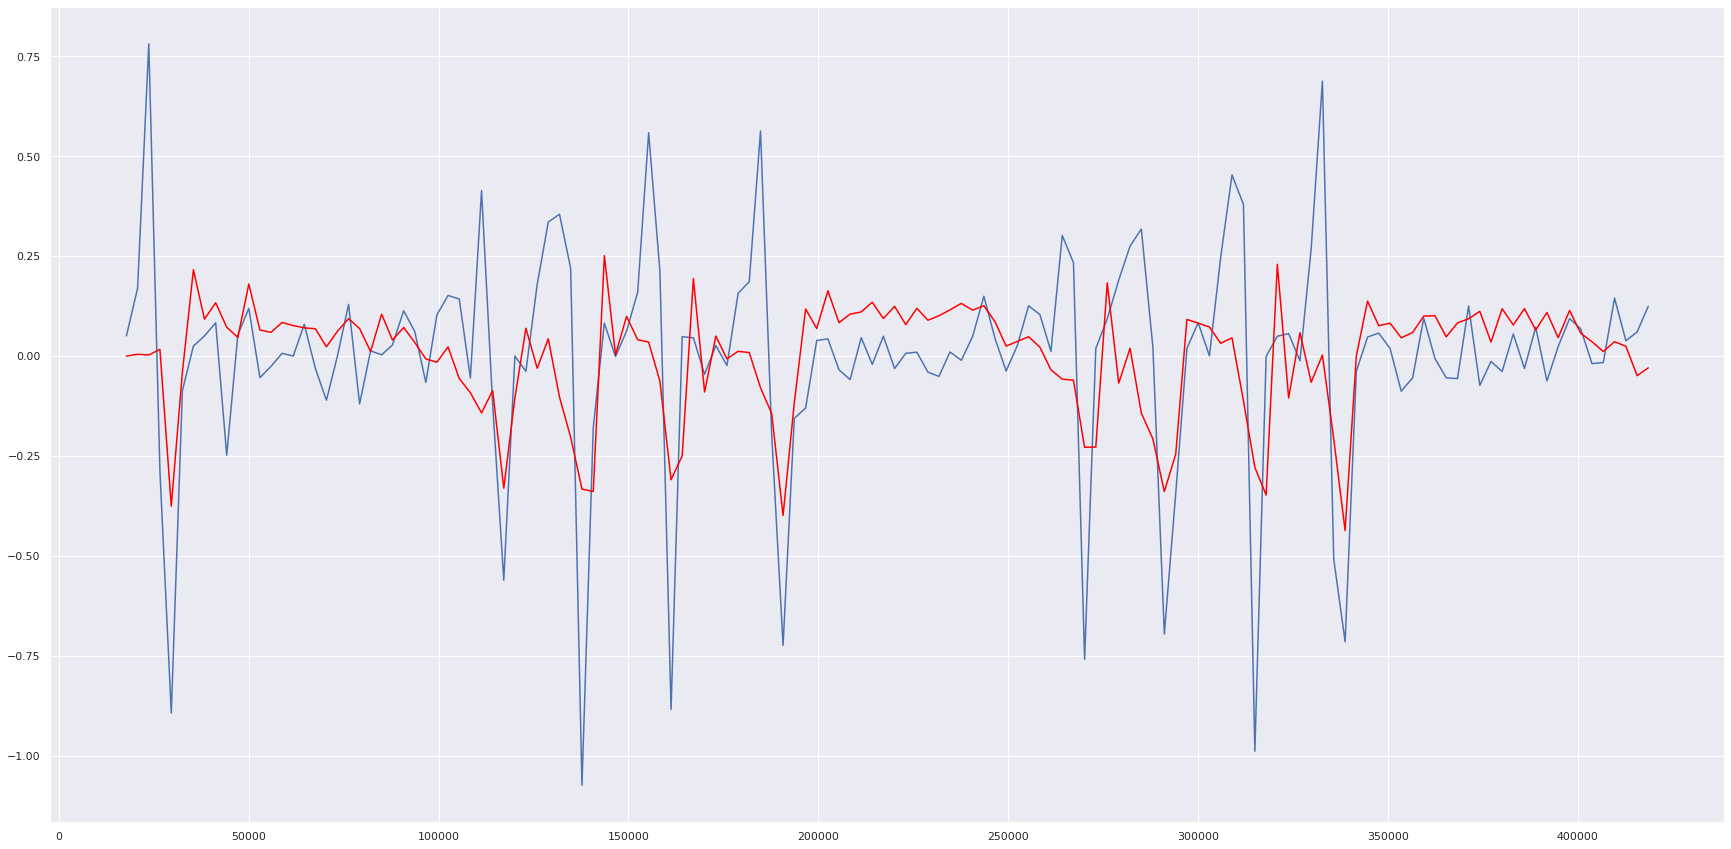

In [0]:
model_AR = run_arima(df= df_example_trans, ts='ws_log_diff',p=2,d=0,q=2)

## Facebook Prophet

In [0]:
def days_between(d1, d2):
  """ return the number of days between two different days """
  d1 = datetime.strptime(d1, "%Y-%m-%d")
  d2 = datetime.strptime(d2, "%Y-%m-%d")

  return abs((d2-d1).days + 1)

In [0]:
# Inputs for query

date_column = 'ds'
metric_column = 'ws'
table = df_example
start_training_date = '2010-02-05'
end_training_date = '2012-10-26'
start_forecasting_date = '2012-10-27'
end_forecasting_date = '2013-12-31'
year_to_estimate = '2013'

# Inputs for forecasting

# future_num_points
# If doing different time intervals, change future_num_points
future_num_points = days_between(start_forecasting_date, end_forecasting_date)

cap = None # 2e6

# growth: default = 'linear'
# Can also choose 'logistic'
growth = 'linear'

# n_changepoints: default = 25, uniformly placed in first 80% of time series
n_changepoints = 25 

# changepoint_prior_scale: default = 0.05
# Increasing it will make the trend more flexible
changepoint_prior_scale = 0.05 

# changpoints: example = ['2016-01-01']
changepoints = None 

# holidays_prior_scale: default = 10
# If you find that the holidays are overfitting, you can adjust their prior scale to smooth them
holidays_prior_scale = 10 

# interval_width: default = 0.8
interval_width = 0.8 

# mcmc_samples: default = 0
# By default Prophet will only return uncertainty in the trend and observation noise.
# To get uncertainty in seasonality, you must do full Bayesian sampling. 
# Replaces typical MAP estimation with MCMC sampling, and takes MUCH LONGER - e.g., 10 minutes instead of 10 seconds.
# If you do full sampling, then you will see the uncertainty in seasonal components when you plot:
mcmc_samples = 0

# holiday: default = None
# thanksgiving = pd.DataFrame({
#   'holiday': 'thanksgiving',
#   'ds': pd.to_datetime(['2014-11-27', '2015-11-26',
#                         '2016-11-24', '2017-11-23']),
#   'lower_window': 0,
#   'upper_window': 4,
# })
# christmas = pd.DataFrame({
#   'holiday': 'christmas',
#   'ds': pd.to_datetime(['2014-12-25', '2015-12-25', 
#                         '2016-12-25','2017-12-25']),
#   'lower_window': -1,
#   'upper_window': 0,
# })
# holidays = pd.concat((thanksgiving,christmas))
holidays = None

daily_seasonality = True

In [0]:
df_prophet = df_example_trans[['ds','ws']]
df_prophet = df_prophet.reset_index()
df_prophet = df_prophet.rename(columns = {'ds':'ds','ws':'y'})
df_prophet['ds']=pd.to_datetime(df_prophet['ds'])
df_prophet['y']=pd.to_numeric(df_prophet['y'], errors='ignore')


In [0]:
def daily_forecast(df,holidays,growth,n_changepoints=25,holidays_prior_scale=10,changepoint_prior_scale =0.05,
                   changepoints=None,interval_width =0.8, mcmc_samples=1, future_num_points =10, daily_seasonality =True):
  df_c=df.copy()
  m = Prophet(growth = growth,
              n_changepoints = n_changepoints,
              changepoint_prior_scale = changepoint_prior_scale,
              changepoints = changepoints,
              holidays = holidays,
              holidays_prior_scale = holidays_prior_scale,
              interval_width = interval_width,
              mcmc_samples = mcmc_samples, 
              daily_seasonality = daily_seasonality)
  m.fit(df)
  future = m.make_future_dataframe(periods =future_num_points)
  forecst = m.predict(future)

  m.plot(forecst);
  m.plot_components(forecst)

  return forecst
  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


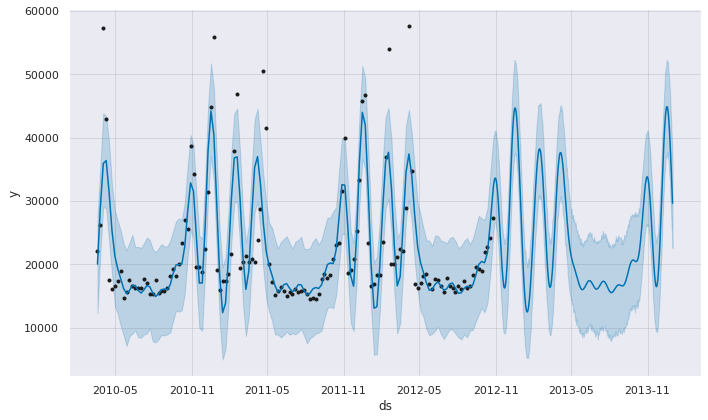

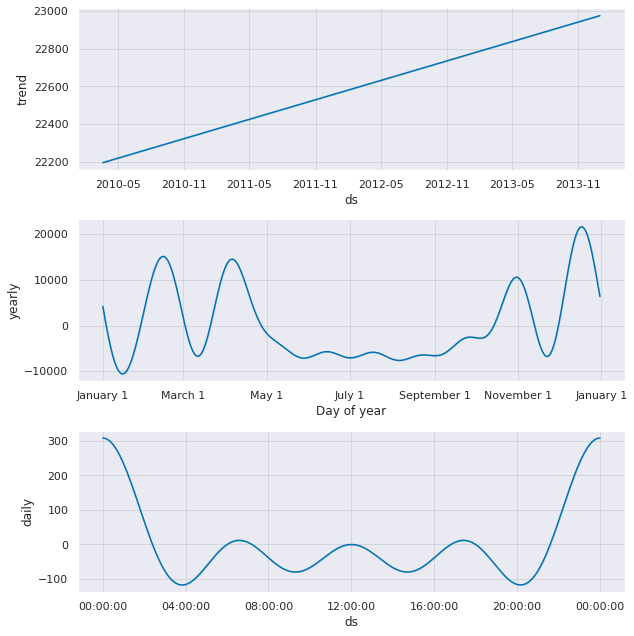

In [0]:
forecst=daily_forecast(df_prophet,holidays,growth,n_changepoints,holidays_prior_scale,
                       changepoint_prior_scale,changepoints,interval_width,mcmc_samples,future_num_points,daily_seasonality)

## Calculate Metrics (from Prophet)

In [0]:
def calculate_mape(y_true, y_pred):
    """ Calculate mean absolute percentage error (MAPE)"""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_mpe(y_true, y_pred):
    """ Calculate mean percentage error (MPE)"""
    return np.mean((y_true - y_pred) / y_true) * 100

def calculate_mae(y_true, y_pred):
    """ Calculate mean absolute error (MAE)"""
    return np.mean(np.abs(y_true - y_pred)) * 100

def calculate_rmse(y_true, y_pred):
    """ Calculate root mean square error (RMSE)"""
    return np.sqrt(np.mean((y_true - y_pred)**2))

def print_error_metrics(y_true, y_pred):
    print('MAPE: %f'%calculate_mape(y_true, y_pred))
    print('MPE: %f'%calculate_mpe(y_true, y_pred))
    print('MAE: %f'%calculate_mae(y_true, y_pred))
    print('RMSE: %f'%calculate_rmse(y_true, y_pred))
    return

In [0]:
print_error_metrics(y_true = df_prophet['y'], y_pred = forecst['yhat'])

MAPE: 14.232189
MPE: -3.356313
MAE: 349808.770019
RMSE: 5809.200940


# LSTM

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential as Sequential
from keras.layers import Dense as Dense
from keras.layers import LSTM as LSTM

def ts_lstm_model(df, ts, look_back, epochs, type_ = None, train_fraction = 0.67):

  def create_dataset(dataset, look_back = 1):

    X, Y =[],[]
    for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), 0]
      X.append(a)
      Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

  np.random.seed(7)
  dataset = df['ws'].values.astype('float32')

  scaler = MinMaxScaler(feature_range = (0,1))
  dataset = scaler.fit_transform(dataset.reshape(-1,1))
  

  train_size = int(len(dataset) * train_fraction)
  test_size  = len(dataset) - train_size

  train = dataset[:train_size,:]
  test  = dataset[train_size:,:]

  look_back =look_back
  trainX, trainY = create_dataset(train, look_back)
  testX, testY = create_dataset(test, look_back)


  if type_ == 'regresion with time steps':
    trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = np.reshape(testX,(testX.shape[0],testX.shape[1],1))
  elif type_ == 'stacked with memory between between batches':
    trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = np.reshape(testX,(testX.shape[0],testX.shape[1],1))
  else: 
    trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1]))
    testX = np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

  # LSTM Creation
  batch_size = 1
  model = keras.Sequential()

  if type_=='regression with time steps':
    model.add(tf.keras.layers.LSTM(4,input_shape=(look_back,1)))
  elif type_ =='memory between batches':
    model.add(tf.keras.layers.LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateteful = True))
  elif  type_=='stacked with memory between batches':
    model.add(tf.keras.layers.LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
    model.add(tf.keras.layers.LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
  else:
    model.add(tf.keras.layers.LSTM(4, input_shape = (1, look_back)))

  model.add(tf.keras.layers.Dense(1))
  model.compile(loss = 'mean_squared_error', optimizer = 'adam')

  model.summary()

  if type_ == 'memory between batches' or type_ == 'stacked with memory between batches':
      for i in range(100):
        model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
  else:
      model.fit(trainX, 
                trainY, 
                epochs = epochs, 
                batch_size = 1, 
                verbose = 0)
  
  # Make predictions
  if type_ == 'memory between batches' or type_ == 'stacked with memory between batches':
    trainPredict = model.predict(trainX, batch_size=batch_size)
    testPredict = model.predict(testX, batch_size=batch_size)
  else:
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
  
  # Invert predictions
  trainPredict = scaler.inverse_transform(trainPredict)
  trainY = scaler.inverse_transform([trainY])
  testPredict = scaler.inverse_transform(testPredict)
  testY = scaler.inverse_transform([testY])
  
  # Calculate root mean squared error
  trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
  print('Train Score: %.2f RMSE' % (trainScore))
  testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
  print('Test Score: %.2f RMSE' % (testScore))
  
  # Shift train predictions for plotting
  trainPredictPlot = np.empty_like(dataset)
  trainPredictPlot[:, :] = np.nan
  trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
  
  # Shift test predictions for plotting
  testPredictPlot = np.empty_like(dataset)
  testPredictPlot[:, :] = np.nan
  testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
  
  # Plot baseline and predictions
  plt.figure(figsize=(20,10))
  plt.plot(scaler.inverse_transform(dataset))
  plt.plot(trainPredictPlot)
  plt.plot(testPredictPlot)
  plt.show()
  plt.close()
  
  return


Using TensorFlow backend.


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 4)                 160       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________
Train Score: 4211.73 RMSE
Test Score: 5017.90 RMSE


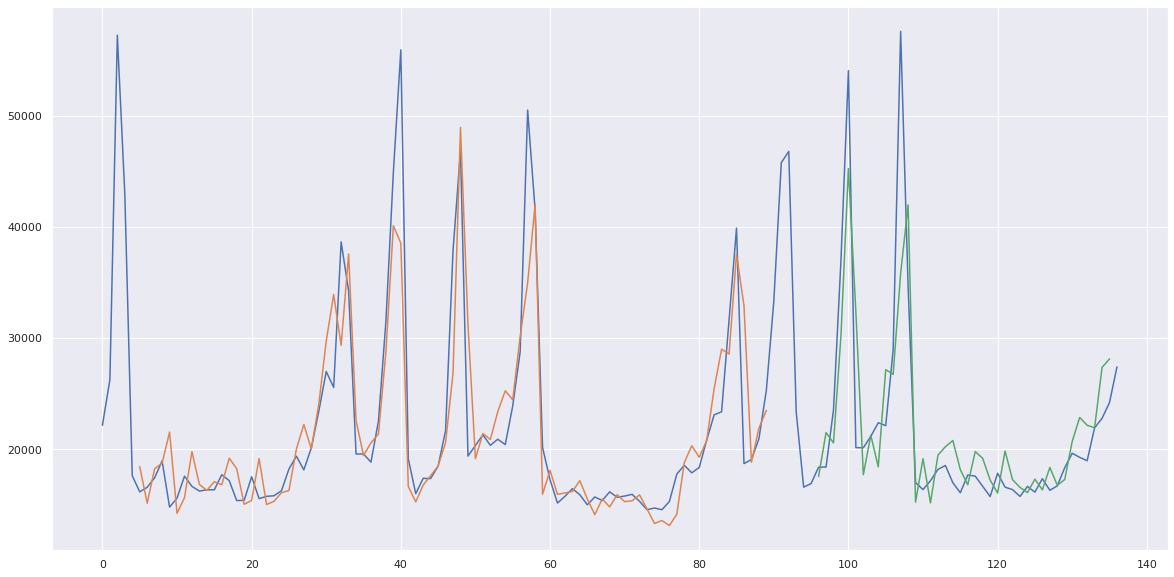

In [0]:
test =  ts_lstm_model(df_example_trans, df_example_trans['ws'], look_back= 5, epochs = 550)